# Linear Regression

This notebook will first build a linear regression model then use it for [Mechanical Characterisctics of Concrete](dataset/Concrete_Data.csv) datset. 

In [21]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [22]:
#import data from local directory
df = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Supervised Learning/3_Single Neuron Linear Regression/Dataset/Concrete_Data.csv")

In [23]:
# Show the first 5 rows of the dataset
print(df.head())
print("Target Variable is Strength (Compressive strength of Concrete in MPa)")

   Cement   Slag  Ash  Water  Superplasticizer  Coarse   Fine  Age  Strength
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28     79.99
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28     61.89
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270     40.27
3   332.5  142.5  0.0  228.0               0.0   932.0  594.0  365     41.05
4   198.6  132.4  0.0  192.0               0.0   978.4  825.5  360     44.30
Target Variable is Strength (Compressive strength of Concrete in MPa)


In [24]:
# a statistical summary of data in the DataFrame.
df.describe()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse,Fine,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


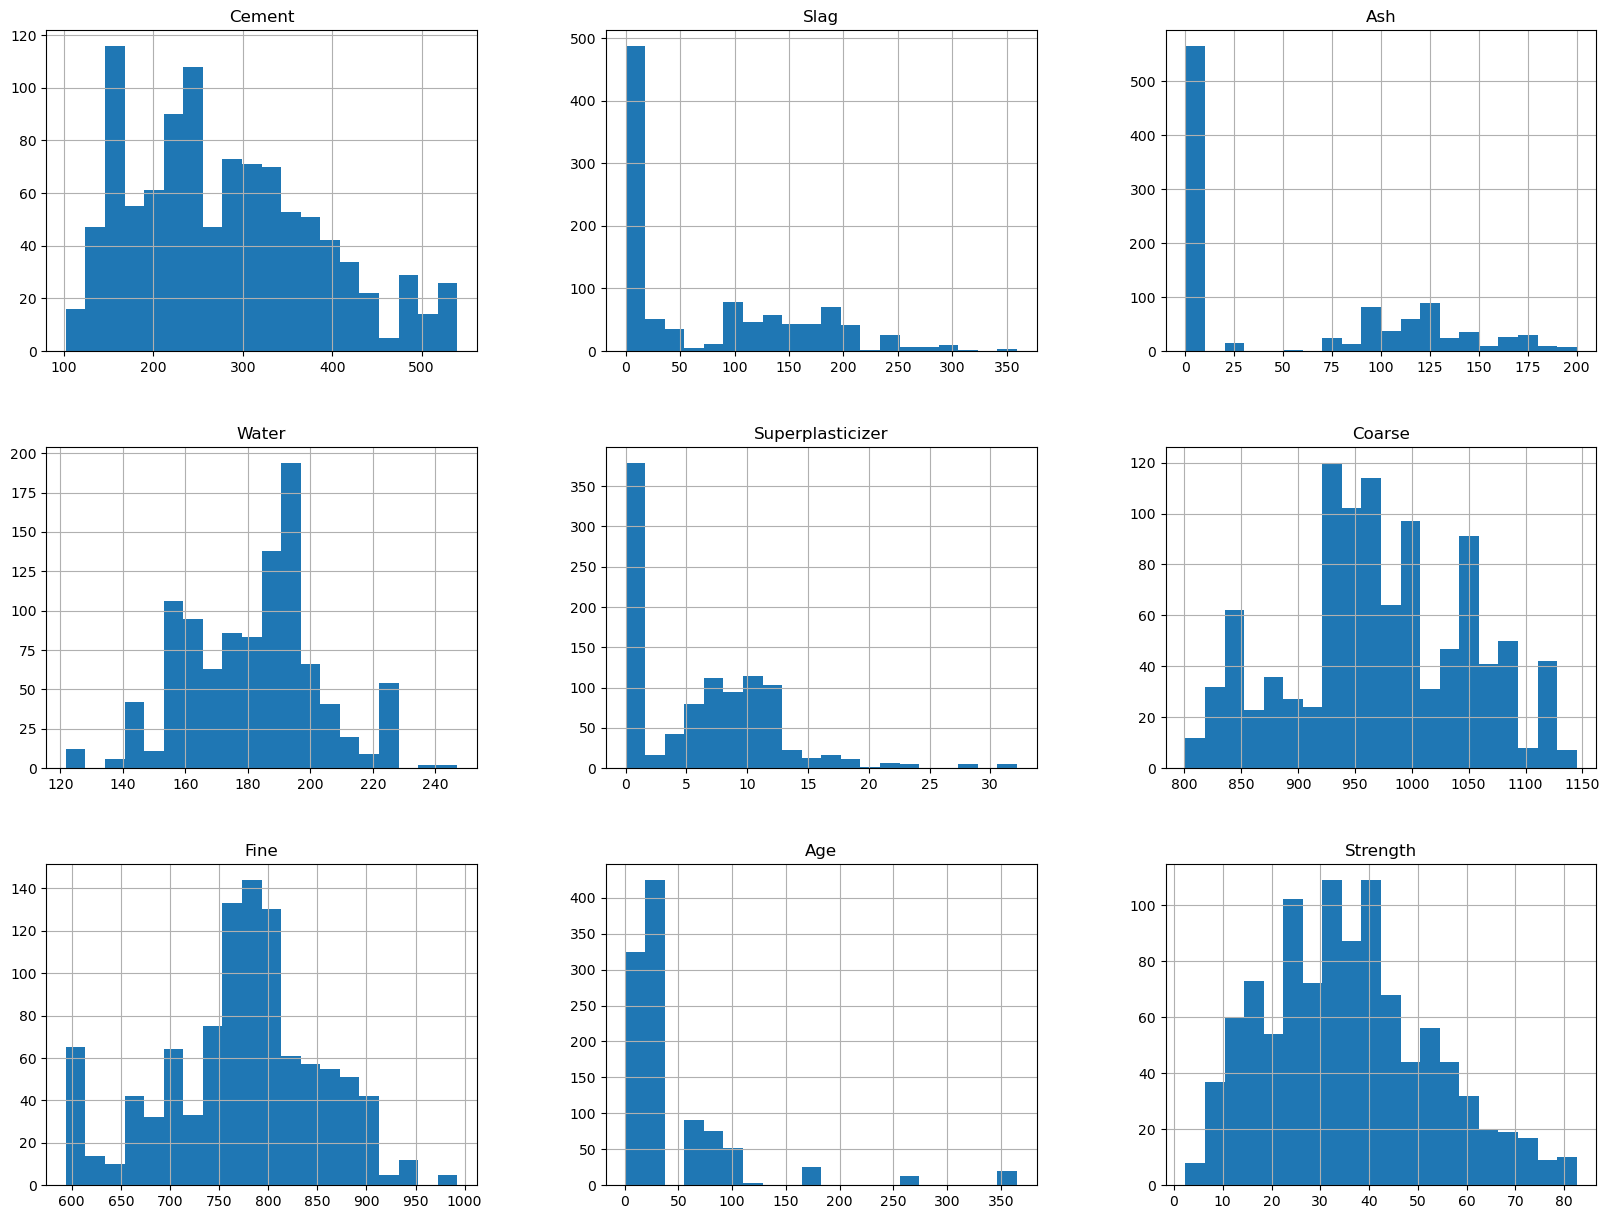

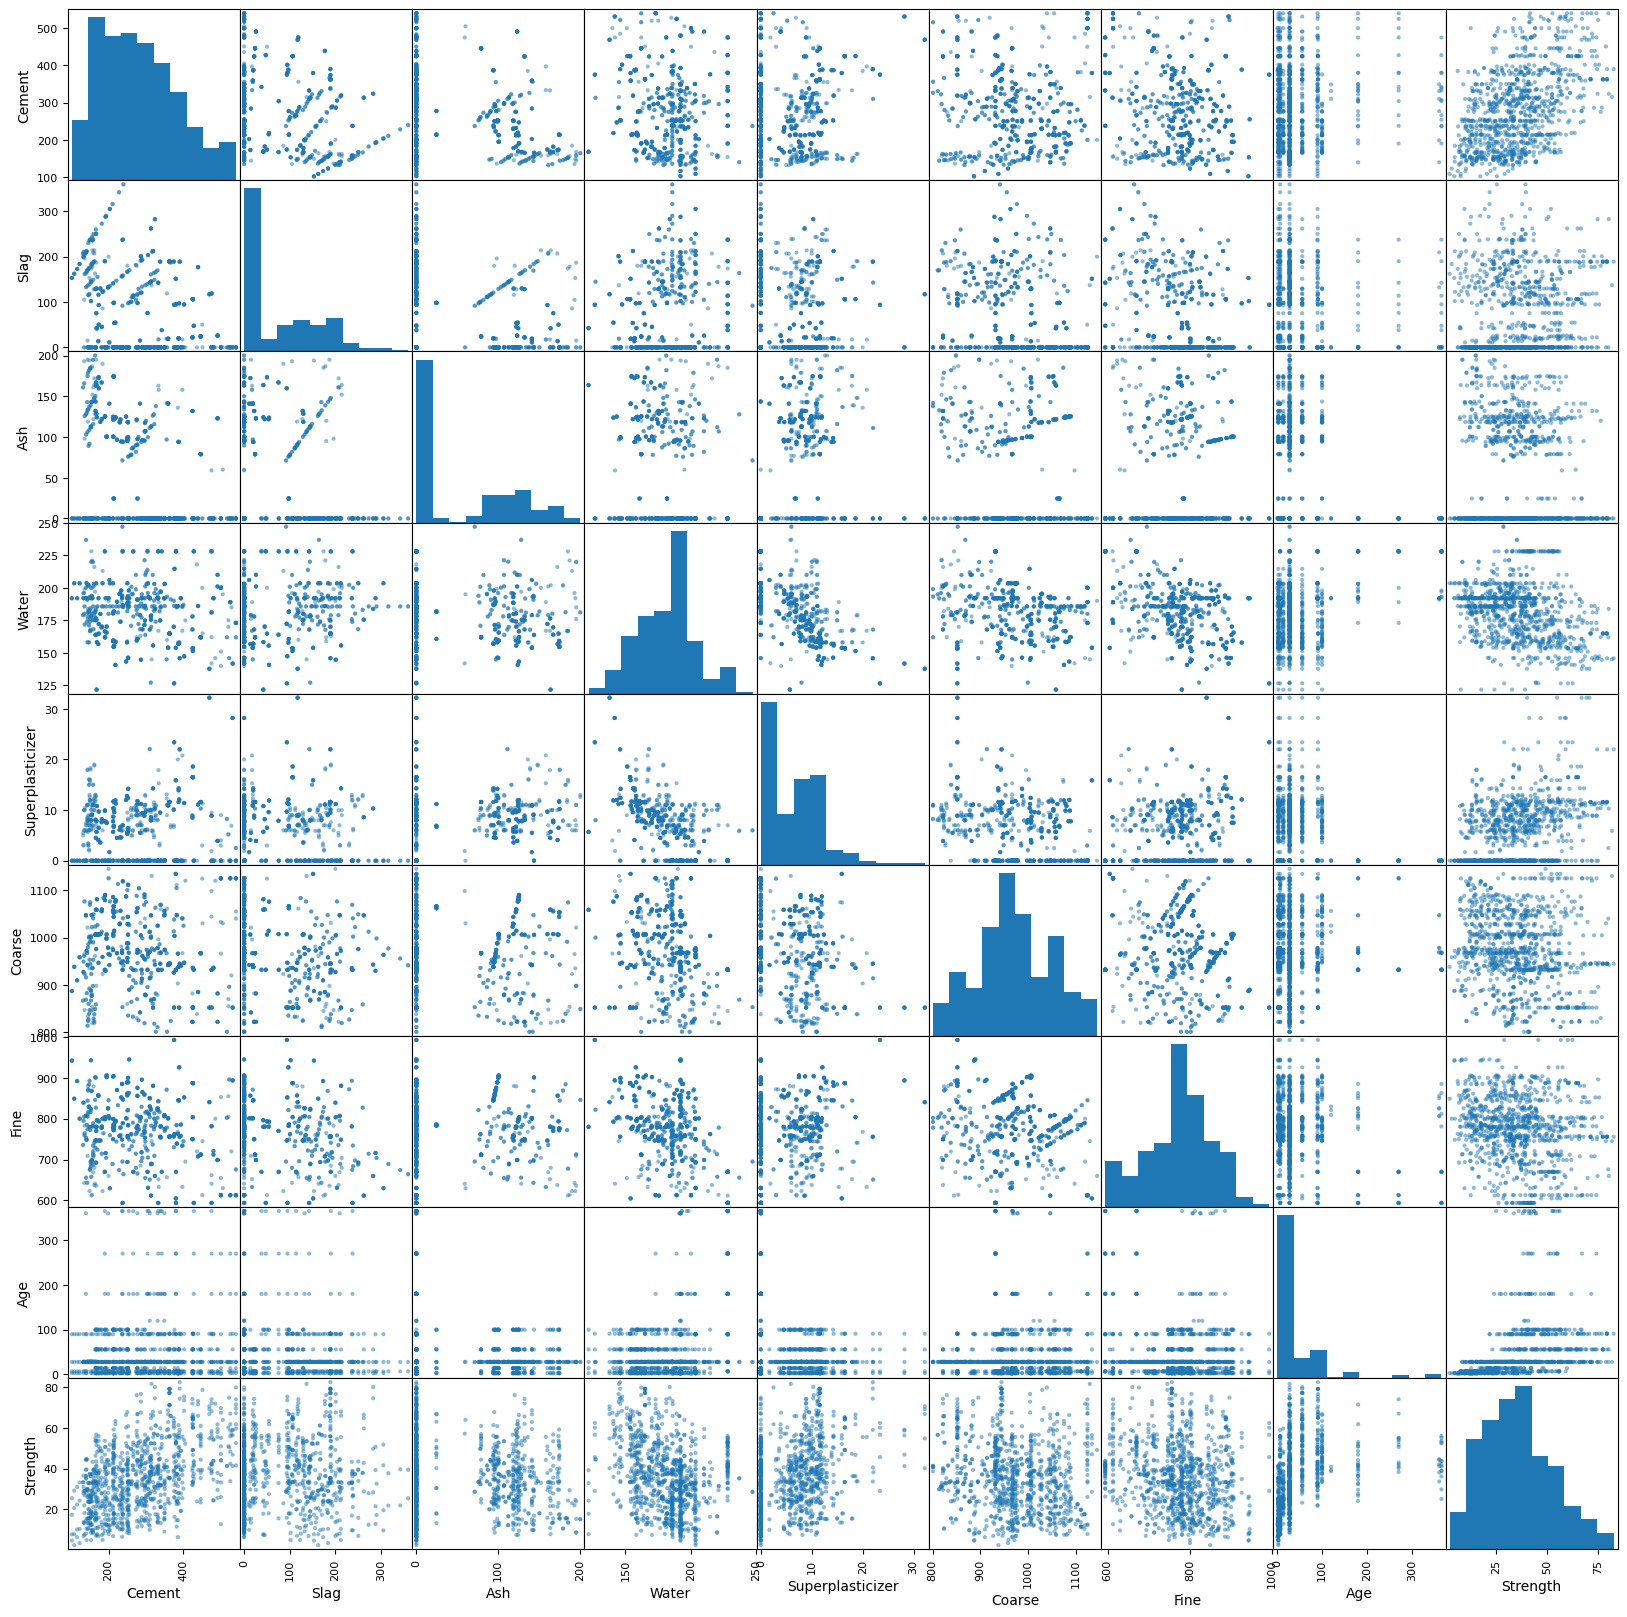

In [25]:
# relevant plots
df.hist(bins=20, figsize=(20,15))
plt.show()
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

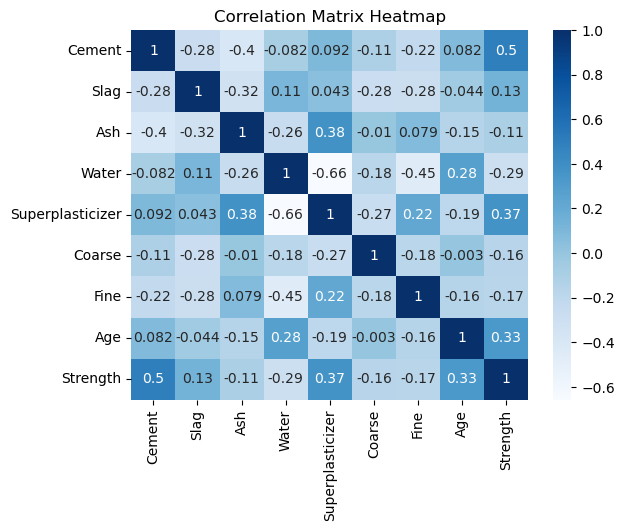

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
import numpy as np  # Ensure numpy is imported

class LinearRegression:
    """
    A class that implements linear regression using gradient descent.
    """

    def __init__(self):
        self.weight = None  # Initialize the weight vector
        self.loss = []  # To track the loss during training

    def fit(self, X, y, learning_rate=0.01, epochs=1000):
        m, n = X.shape  # Get the shape of the feature matrix
        self.weight = np.zeros((n, 1))  # Initialize weights with zeros
        
        for _ in range(epochs):
            # Calculate predictions
            predictions = np.dot(X, self.weight)
            # Calculate error
            error = predictions - y
            # Calculate gradient
            gradient = np.dot(X.T, error) / m
            # Update the weights
            self.weight -= learning_rate * gradient
            # Calculate Mean Squared Error (MSE)
            mse = np.mean(error ** 2)
            # Store the loss
            self.loss.append(mse)

    def predict(self, X):
        # Return predictions based on the trained weights
        return np.dot(X, self.weight)

In [28]:
# Split data into target (y) and features (X)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

In [29]:
from sklearn.model_selection import train_test_split
# Split dataset for test/train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [30]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [31]:
# Add bias term
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)


In [32]:
# Train model
model = LinearRegression()  # Instantiate the LinearRegression class
model.fit(X_train, y_train, learning_rate=0.01, epochs=1000)  # Train with specified learning rate and epochs


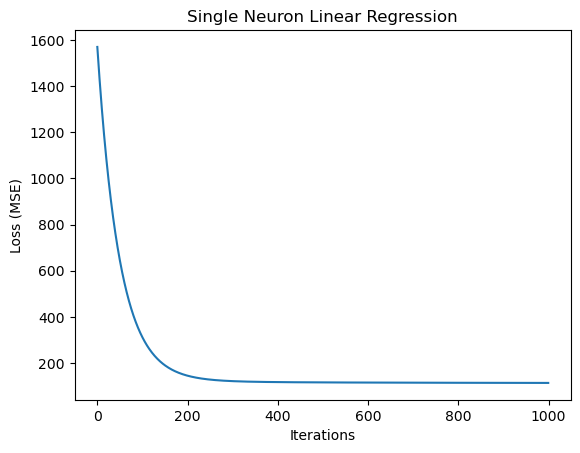

In [33]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
# Plot training loss
plt.plot(model.loss)  # Plot the loss values stored in the model's loss attribute
plt.xlabel('Iterations')  # Label the x-axis as 'Iterations'
plt.ylabel('Loss (MSE)')  # Label the y-axis as 'Loss (MSE)'
plt.title('Single Neuron Linear Regression')  # Title the plot
plt.show()  # Display the plot


In [34]:
# Make predictions on the test set
y_predictions = model.predict(X_test)

# Compute the Mean Squared Error (MSE) between the actual and predicted values
mean_squared_error = np.mean((y_test - y_predictions) ** 2)

# Display the MSE for the test set
print("Mean Squared Error on Test Set:", mean_squared_error)


Mean Squared Error on Test Set: 98.27306467008327


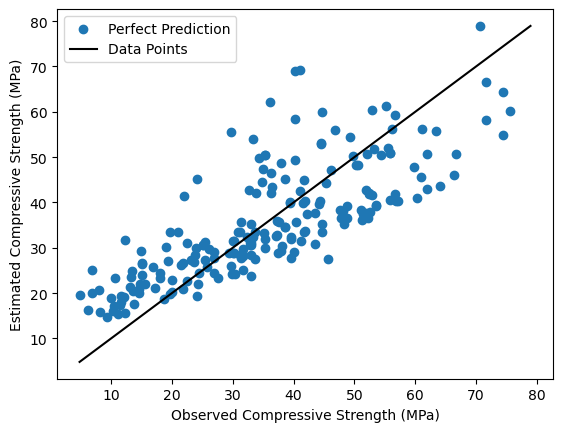

In [35]:
# Create a scatter plot of actual versus predicted values
plt.scatter(y_test, y_predictions)  # Scatter plot to compare actual and predicted

# Find the minimum and maximum for the plot's reference line
upper_bound = max(max(y_test), max(y_predictions))
lower_bound = min(min(y_test), min(y_predictions))

# Plot a line of perfect prediction in a different color (e.g., blue)
plt.plot([lower_bound, upper_bound], [lower_bound, upper_bound], color='black')  # Ideal prediction line

# Set the axis labels to clarify what the plot represents
plt.xlabel('Observed Compressive Strength (MPa)')  # Label for actual values
plt.ylabel('Estimated Compressive Strength (MPa)')  # Label for predicted values

# Add a legend to indicate plot components
plt.legend(['Perfect Prediction', 'Data Points'])

# Display the scatter plot with the line
plt.show()  # Render the plot


A single neuron linear regression produces a reasonably accurate fit. The mean squared error (MSE) for the test data is 98.27. Including more neurons in the model would notably improve the precision of the regression.